# All modules of the project will be integreated here into the main

In [ ]:
import pandas as pd
from SP500_Symbol_checker import SP500_Symbol_checker

""" SYMBOLS """
# N =: number of

N = input("pleas enter the number of the stocks:")
while type(N) != int:
    try:
        N = int(N)
    except:
        print("The entry is not an integer!")
        N = input("pleas enter as integer as the number of the stocks:")
# print(N)

# Creating list
test = input(
    f"If you want to test the program you can use enter 'test' to a lsit of stocks with {N} element randomly made for you. if not enter'N'."
)
if test.lower() == test:
    Set_stocks = SP500_Symbol_checker(None, N).Symbols_random_gen()
else:
    print(
        "Pleas enter the symboles of stoks that you want to be under consideration.\n"
    )
    counter = 0
    Set_stocks = set()
    for i in range(N):
        while True:
            counter += 1
            temp = str(input(f"pleas enter the {i+1}th symbol:"))
            if SP500_Symbol_checker(temp, 0).Symbols_check():
                Set_stocks.add(temp.upper())
                break
            else:
                print(f"{temp.upper()} isn't a valid symbol! Try again.")
            if counter == 3:
                print(f"First check your symbols! See you.")
                break
print(Set_stocks)

"""Start date/ End date"""
List_stocks = Set_stocks
import yfinance as yf

# lower bound of Start Date
min_date = []
for ticker in List_stocks:
    ticker_temp = yf.Ticker(ticker)
    hist = ticker_temp.history(period="max")
    print(f"The lowest valid date for {ticker} is {hist.index.min()}")
    hist = str(hist.index.min())
    hist = str(hist[:9])
    min_date.append([int(hist[0:4]), int(hist[5:7]), int(hist[8:])])
print(min(min_date))

# S_date End_date

from datetime import date

today = str(date.today())
print(f"Note that Format of date is YYYY-MM-DD!, like {today}")
temp = []
temp.append(int(today[0:4]))
temp.append(int(today[5:7]))
temp.append(int(today[8:]))
today = temp[:]

print("Given the Start data of each stock enter a valid start data!")
# tickers = {'AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM'}

min_dates = []
for ticker in List_stocks:
    ticker_temp = yf.Ticker(ticker)
    hist = ticker_temp.history(period="max")
    # print(f"The lowest valid date for {ticker} is {hist.index.min()}")
    hist = str(hist.index.min())
    hist = str(hist[:9])
    min_dates.append([int(hist[0:4]), int(hist[5:7]), int(hist[8:])])

max_date = max(min_dates)
print(
    f"Given your ticker(s) list the minimum valid date is {max_date[0]}-{max_date[1]}-{max_date[2]}."
)


def data_format_validation(date):

    for i in range(len(date)):
        if i in [4, 7]:
            if date[i] != "-":
                return False
        else:
            try:
                int(date[i])
            except:
                return False
    if int(date[8] + date[9]) > 31 or int(date[5] + date[6]) not in range(0, 13):
        return False

    return True


S_date = str(input(f"Enter Start Date:"))
temp = S_date

if data_format_validation(S_date):
    temp = []
    temp.append([int(S_date[0:4]), int(S_date[5:7]), int(S_date[8:])])
    S_date = temp[0][:]
    print(S_date)
    if S_date < max_date:
        print(
            f" Entered data is not in valid range. Start data must be grater than equal {max_date[0]}-{max_date[1]}-{max_date[2]}"
        )
else:
    print("Entered data is not in accepteable format!")

if S_date[1] < 10:
    S_date[1] = "0" + str(S_date[1])
if S_date[2] < 10:
    S_date[2] = "0" + str(S_date[2])
S_date = (
    str(S_date[0]) + "-" + str(S_date[1]) + "-" + str(S_date[2])
)  # date is changed to string

E_date = str(input(f"Enter End Date:"))

if data_format_validation(E_date):
    temp = []
    temp.append([int(E_date[0:4]), int(E_date[5:7]), int(E_date[8:])])
    E_date = temp[0][:]
    print(E_date)
    if E_date > today:
        print(
            f" Entered data is not in valid range. Start data must be less than equal {today[0]}-{today[1]}-{today[2]}"
        )
else:
    print("Entered data is not in accepteable format!")

if E_date[1] < 10:
    E_date[1] = "0" + str(E_date[1])
if E_date[2] < 10:
    E_date[2] = "0" + str(E_date[2])

E_date = (
    str(E_date[0]) + "-" + str(E_date[1]) + "-" + str(E_date[2])
)  # date is changed to string


In [ ]:
# interval 
#1m - 7days, 2m, 5m, 15m, 30m, 60m, 90m - 60 days, 1d(defult), 5d, 1wk, 1mo, 3mo -full history

intervals = ["1m" , "2m", "5m", "15m", "30m", "60m", "90m", "1d", "5d", "1wk", "1mo" , "3mo"]
print("Acceptabale intervals are in the following form:")
print("\n one minutes (maximum duration must be 7 days!): 1m")
print("\n two, five, fifteen, therty, sixty and ninty minutes (maximum duration must be 60 days!): 2m, 5m, ..., 90m")
print("\n five day (without any ristriction on duration): 5d ")
print("\n one weak (without any ristriction on duration): 1wk ")
print("\n one or three month (without any ristriction on duration): 1mo, 3mo ")

interval = input("\n Enter your suitable onterval:")

if not interval in intervals:
    print("\n Entered interval is not acceptable!")
else:
    print(f"\n Entered interval is {interval}.")

Acceptabale intervals are in the following form:

 one minutes (maximum duration must be 7 days!): 1m

 two, five, fifteen, therty, sixty and ninty minutes (maximum duration must be 60 days!): 2m, 5m, ..., 90m

 five day (without any ristriction on duration): 5d 

 one weak (without any ristriction on duration): 1wk 

 one or three month (without any ristriction on duration): 1mo, 3mo 

 Entered interval is 5d.


In [22]:
# should be deleted
# Start_date, End_date, Interval
import numpy as np
from datetime import date

# Start date and End date will be replaced
Start_date = np.datetime64("2020-11-04")
End_date = np.datetime64(str(date.today())[:10])
print(End_date - Start_date)
Start_date = str(Start_date)
End_date = str(End_date)
Interval = "1d"
# Given the calculation of time diffrence or changing date format is complicated, time frame and time steps calculate base on the count of the data


1826 days


In [29]:
import yfinance as yf

data = yf.download(List_stocks, start=S_date, end=E_date , interval=interval , auto_adjust=False)
data.head()

# Adjust close -> tells you what the stock’s price would have been if all historical prices were adjusted so that dividends and splits didn’t change the apparent value of your holdings.
# Returns, Risk, Sharpe_ratio and Markowits will be compute based on Adj Close! 
# More price or data can me fetch by user!

DF = data["Adj Close"]
DF

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,GOOGL,IBM,MSFT,NVDA
Date,,,,,
2015-01-09,24.855755,24.864506,96.868073,40.300282,0.478479
2015-01-14,24.365343,25.123224,94.852890,39.249844,0.473680
2015-01-29,26.384693,25.485723,94.658104,35.876545,0.474640
2015-02-03,26.329214,26.482349,96.478447,35.526417,0.482558
2015-02-13,28.311180,27.369232,98.338486,37.464985,0.535349
...,...,...,...,...,...
2024-11-27,234.098953,168.486969,222.424271,420.678406,135.301193
2024-12-02,238.742477,170.737045,222.884949,428.624756,138.590256
2024-12-12,247.082886,191.336212,227.658463,447.103241,137.310089


In [30]:

import numpy as np 

#DF_simple_retrun = DF/DF.shift(1)-1
DF_simple_retrun = DF.pct_change()
print(DF_simple_retrun)
DF_log_retrun =  np.log(DF/ DF.shift(1))
DF_log_retrun

Ticker          AAPL     GOOGL       IBM      MSFT      NVDA
Date                                                        
2015-01-09       NaN       NaN       NaN       NaN       NaN
2015-01-14 -0.019730  0.010405 -0.020803 -0.026065 -0.010030
2015-01-29  0.082878  0.014429 -0.002054 -0.085944  0.002026
2015-02-03 -0.002103  0.039105  0.019231 -0.009759  0.016684
2015-02-13  0.075276  0.033490  0.019279  0.054567  0.109398
...              ...       ...       ...       ...       ...
2024-11-27  0.022012  0.027130  0.017715  0.014364 -0.046566
2024-12-02  0.019836  0.013355  0.002071  0.018889  0.024309
2024-12-12  0.034935  0.120648  0.021417  0.043111 -0.009237
2024-12-17  0.022262  0.018025 -0.014165  0.010899 -0.050604
2024-12-27  0.008324 -0.013612 -0.027034 -0.052656  0.050771

[507 rows x 5 columns]


Ticker,AAPL,GOOGL,IBM,MSFT,NVDA
Date,,,,,
2015-01-09,NaN,NaN,NaN,NaN,NaN
2015-01-14,-0.019928,0.010351,-0.021023,-0.026411,-0.010081
2015-01-29,0.079622,0.014326,-0.002056,-0.089864,0.002024
2015-02-03,-0.002105,0.038360,0.019048,-0.009807,0.016546
2015-02-13,0.072578,0.032941,0.019096,0.053130,0.103818
...,...,...,...,...,...
2024-11-27,0.021774,0.026769,0.017560,0.014262,-0.047685
2024-12-02,0.019642,0.013266,0.002069,0.018713,0.024018
2024-12-12,0.034338,0.113908,0.021191,0.042208,-0.009280


In [31]:
DF_simple_mean = DF_simple_retrun.mean()
DF_simple_volatility = DF_simple_retrun.std()
print(DF_simple_mean)
print(DF_simple_volatility)

# annual mode should be considered

#mean_annual = DF_simple_retrun.mean() * 252
#vol_annual = DF_simple_retrun.std() * np.sqrt(252)
#print(mean_annual)
#print(vol_annual)

Ticker
AAPL     0.005285
GOOGL    0.004777
IBM      0.002137
MSFT     0.005256
NVDA     0.013457
dtype: float64
Ticker
AAPL     0.036609
GOOGL    0.038193
IBM      0.032363
MSFT     0.033940
NVDA     0.066957
dtype: float64


Given the lenght of your data, 730, enter a time_frame and a time_step.
        AAPL     GOOGL       IBM      MSFT      NVDA
0  -3.959523 -3.915597 -3.904436 -4.017356 -3.986736
1  -4.228388 -4.083049 -4.091305 -4.109125 -4.099557
2  -3.848654 -3.874971 -3.866164  -3.94991 -3.980802
3  -3.580031 -3.519361 -3.489363 -3.463867 -3.463332
4  -3.166008 -3.198729 -3.198505 -3.147562 -3.150283
5  -2.796509 -2.863941 -2.840954 -2.750374 -2.769069
6  -2.480966 -2.472045 -2.448919 -2.484616 -2.442492
7  -2.387626 -2.432724 -2.403196  -2.39186 -2.333885
8  -2.264596 -2.179458 -2.138371 -2.166728 -2.174767
9  -2.194052 -2.188029 -2.160572 -2.187415 -2.239653
10 -2.709711 -2.703997 -2.642482 -2.672167 -2.689186
11 -2.578833 -2.617842 -2.614219 -2.602989 -2.586959
12 -2.522439  -2.53368 -2.485238 -2.530917 -2.535941
13  -2.20857 -2.166062 -2.171165 -2.143525 -2.192232
14 -1.836619 -1.830907 -1.801882 -1.764458 -1.747372
15  -1.85875 -1.927524 -1.947554 -1.963086 -1.919839
16 -1.914685 -1.909439 -1.8

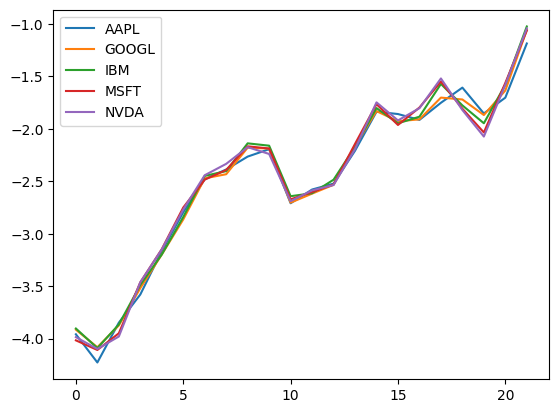

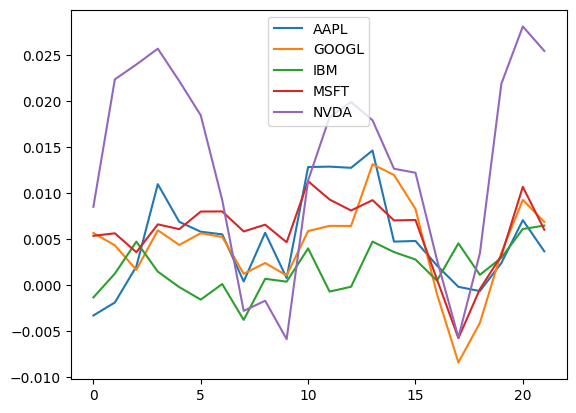

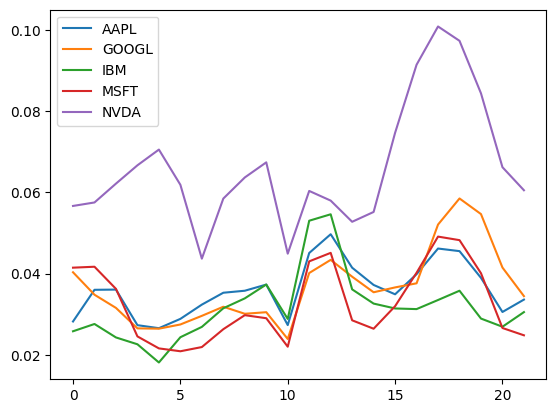

In [36]:
import pandas as pd
# time_frame and step_time
len_day =  int((np.datetime64(E_date) - np.datetime64(S_date)) / np.timedelta64(1, 'D'))//int(interval[0])
print(f"Given the lenght of your data, {len_day}, enter a time_frame and a time_step.")

time_frame = int(input("Enter time_frame:"))
time_step = int(input("Enter time_step:"))
residual = (len(DF)-time_frame)%time_step
steps = (len(DF)-time_frame)//time_step
df_simple_mean = pd.DataFrame(columns = DF.columns.tolist() , index = range(0,steps))
df_simple_volatility = pd.DataFrame(columns = DF.columns.tolist() , index = range(0,steps))
df_log_retrun = pd.DataFrame(columns = DF.columns.tolist() , index = range(0,steps))
# list(DF.columns) == DF.columns.tolist()
#print(df_simple_mean.head())

for i in range(0,steps):
        Temp = DF.iloc[i*time_step+residual:i*time_step+time_frame]
        #print(temp.head())
        df_log_retrun.iloc[i] = [np.log(Temp.iloc[j,-1]/Temp.iloc[j,1]) for j in range(0,Temp.shape[1])]
        Temp = Temp.pct_change()
        temp = Temp.mean()
        #print(list(temp.iloc[:]))
        df_simple_mean.iloc[i]= list(temp.iloc[:])
        temp = Temp.std()
        df_simple_volatility.iloc[i] = list(temp.iloc[:])
print(df_log_retrun)
#print(df_simple_mean)
#print(df_simple_volatility)
import matplotlib.pyplot as plt

df_log_retrun.plot()
plt.show()

df_simple_mean.plot()
plt.show()

df_simple_volatility.plot()
plt.show()

In [19]:
DF


Ticker,AAPL,GOOGL,IBM,MSFT,NVDA
Date,,,,,
2005-11-04,1.835730,9.703594,42.954807,18.569904,0.260242
2005-11-09,1.804510,9.423245,42.974815,18.778858,0.265744
2005-11-14,1.844737,9.866138,43.763329,19.064449,0.265591
2005-11-29,2.044370,10.029425,46.222317,19.336891,0.271093
2005-12-09,2.231396,10.170096,45.117310,19.357861,0.277663
...,...,...,...,...,...
2025-09-30,254.630005,243.100006,282.160004,517.950012,186.580002
2025-10-10,245.270004,236.570007,277.820007,510.959991,183.160004
2025-10-15,249.339996,251.029999,280.750000,513.429993,179.830002


In [65]:
print(df_simple_volatility)

        AAPL     GOOGL       IBM      MSFT      NVDA
0   0.022077  0.018633  0.021067   0.01585  0.021691
1   0.021317  0.022996  0.013142  0.015755  0.034422
2   0.015035   0.01504  0.013632  0.014119   0.02545
3    0.01353  0.014166   0.00969  0.013189  0.022147
4    0.01195  0.010228  0.012156  0.008477  0.021722
5   0.011157   0.01115   0.00811  0.008598  0.020242
6   0.012784  0.013446  0.010692  0.012971  0.020391
7   0.013324   0.01678  0.018982  0.012461  0.033822
8   0.018842  0.015236  0.010449   0.01685  0.037218
9   0.018799  0.023525  0.014922  0.021045  0.040879
10   0.01885  0.020508  0.009765  0.021425  0.042368
11  0.027092  0.024971  0.021086  0.025998  0.046008
12  0.025442  0.027127  0.015052  0.021432  0.040305
13  0.014796  0.024606  0.013911  0.018614  0.032502
14  0.019945  0.019195  0.011879   0.01579   0.03371
15  0.030783  0.031461  0.018003  0.030839  0.041636
16  0.024631  0.023628  0.013451  0.022794  0.043322
17  0.018431  0.028943  0.011697  0.021063  0.


🧪 Generating 10 random S&P 500 symbols...

**Selected Stocks:** ['BMY', 'LW', 'SWKS', 'GLW', 'CAH', 'IQV', 'CRWD', 'MET', 'FAST', 'DOV']


🔍 Checking minimum valid history date for all selected stocks...
   -> Lowest valid date for BMY is 1972-06-01
   -> Lowest valid date for LW is 2016-11-10
   -> Lowest valid date for SWKS is 1984-09-07
   -> Lowest valid date for GLW is 1981-12-31
   -> Lowest valid date for CAH is 1983-08-04
   -> Lowest valid date for IQV is 2013-05-09
   -> Lowest valid date for CRWD is 2019-06-12
   -> Lowest valid date for MET is 2000-04-05
   -> Lowest valid date for FAST is 1987-08-20
   -> Lowest valid date for DOV is 1980-03-17

✅ Given your ticker(s) list, the **minimum common valid start date** is: **2019-06-12**
Today's date is: 2025-11-07

**Data Range:** 2023-01-01 to 2025-11-01

**Acceptable Intervals:**
  - **1m**: 1 minute (Max 7 days)
  - **2m**: 2 minute (Max 60 days)
  - **5m**: 5 minute (Max 60 days)
  - **15m**: 15 minute (Max 60 days)
  - **

[*******************   40%                       ]  4 of 10 completed


✅ Entered interval is **5d** (5 day (Full history)).

⬇️ Downloading data from Yahoo Finance...


[*********************100%***********************]  10 of 10 completed



--- Simple Returns (First 5 Rows) ---
Ticker           BMY       CAH      CRWD       DOV      FAST       GLW  \
Date                                                                     
2023-01-11 -0.014520 -0.026958  0.024071  0.018003  0.031296  0.029112   
2023-01-26  0.014596  0.017773  0.077010  0.011062  0.010387  0.000549   
2023-01-31 -0.004658 -0.008089  0.013688  0.058049  0.018948 -0.049959   
2023-02-10 -0.006194  0.033398  0.028895  0.009353  0.038048  0.018492   
2023-02-15 -0.010111 -0.015659  0.106094  0.021272  0.018615  0.010780   

Ticker           IQV        LW       MET      SWKS  
Date                                                
2023-01-11  0.078740 -0.023793 -0.027317  0.052494  
2023-01-26  0.031553  0.015529  0.009082  0.115182  
2023-01-31  0.003895  0.011544  0.011077 -0.020978  
2023-02-10 -0.028639 -0.003405 -0.015130  0.090636  
2023-02-15  0.018803  0.008462  0.014566  0.017724  

--- Log Returns (First 5 Rows) ---
Ticker           BMY       CAH     

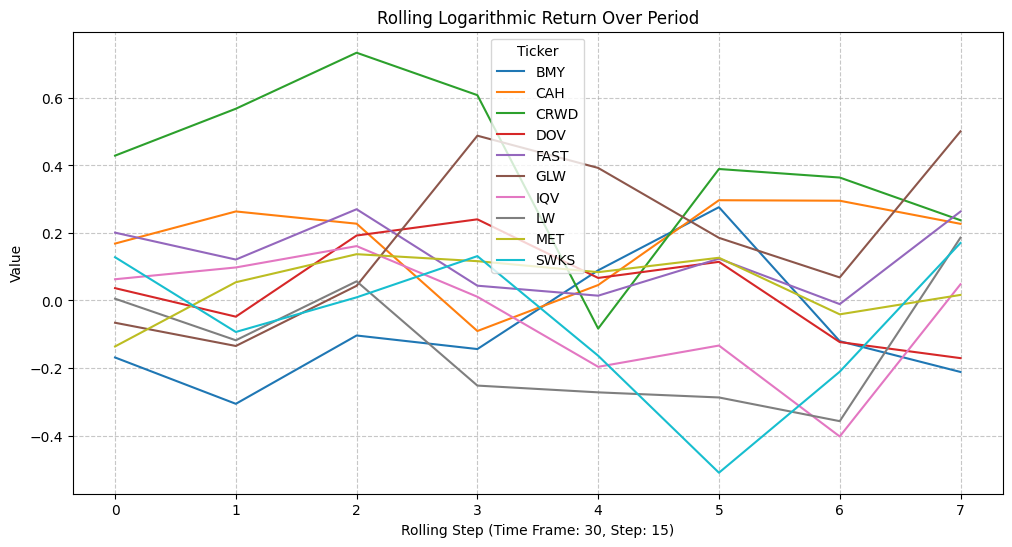

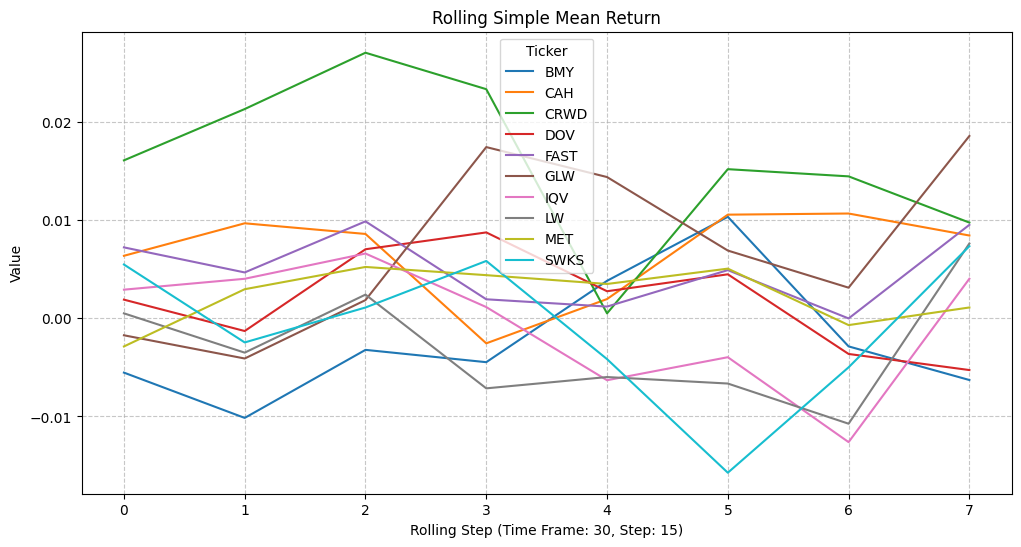

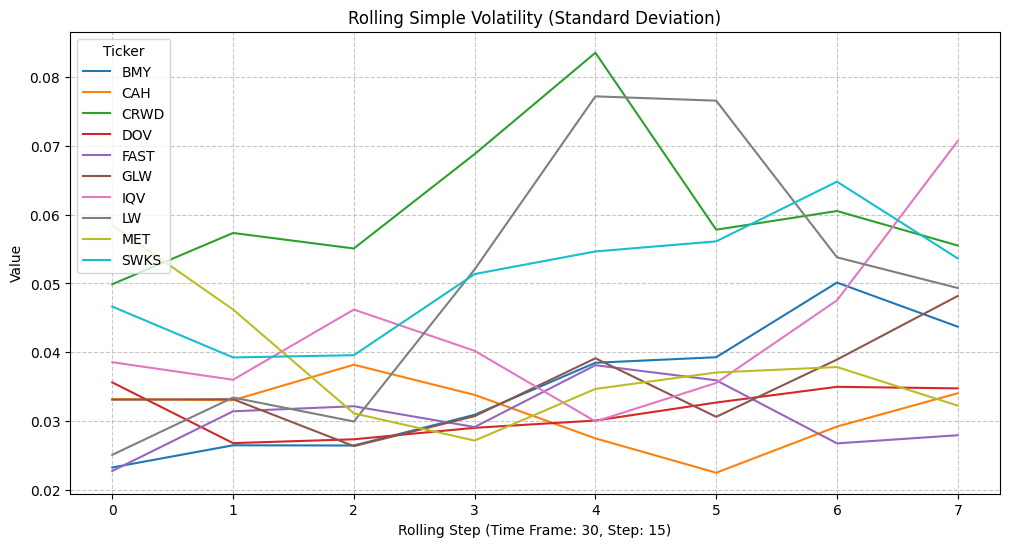

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date, datetime
import matplotlib.pyplot as plt
# Assuming SP500_Symbol_checker is a custom module you have.
from SP500_Symbol_checker import SP500_Symbol_checker


# --- UTILITY FUNCTIONS FOR INPUT/VALIDATION ---

def get_integer_input(prompt: str) -> int:
    """
    Safely gets an integer input from the user, handling non-integer entries.
    """
    while True:
        user_input = input(prompt)
        try:
            return int(user_input)
        except ValueError:
            print("❌ The entry is not a valid integer! Please try again.")

def get_valid_symbols(num_stocks: int) -> set:
    """
    Prompts the user for symbols or generates a random set for testing,
    and validates the entered symbols using SP500_Symbol_checker.
    """
    test_input = input(
        f"If you want to test the program, enter 'Y' to use a random list of {num_stocks} stocks. If not, enter 'N': "
    )

    if test_input.upper() == "Y":
        # Generate a random set of symbols for testing purposes
        print(f"\n🧪 Generating {num_stocks} random S&P 500 symbols...")
        return SP500_Symbol_checker(None, num_stocks).Symbols_random_gen()
    else:
        print("\nPlease enter the symbols of stocks you want to consider.")
        set_stocks = set()
        for i in range(num_stocks):
            # Inner loop for retries on invalid symbol entry
            for attempt in range(1, 4):
                temp_symbol = input(f"Please enter the {i + 1}th symbol:").strip()
                
                # Check if the symbol is valid using the custom checker class
                if SP500_Symbol_checker(temp_symbol, 0).Symbols_check():
                    set_stocks.add(temp_symbol.upper())
                    break  # Move to the next symbol
                else:
                    print(f"❌ '{temp_symbol.upper()}' isn't a valid symbol! Try again.")
                
                if attempt == 3:
                    print("🛑 Maximum retries reached. Please check your symbols and run again.")
                    return set()  # Return empty set to halt the program (or raise an error)
            
            # If the set is empty (due to an error), break the outer loop
            if not set_stocks and num_stocks > 0:
                break
                
        return set_stocks

def get_min_valid_date(stock_symbols: set) -> date:
    """
    Fetches the historical data start date for each ticker and returns the 
    LATEST (maximum) of these start dates, as it's the minimum common date.
    """
    print("\n🔍 Checking minimum valid history date for all selected stocks...")
    min_dates = []
    
    # Iterate through each ticker to find its maximum history
    for ticker in stock_symbols:
        try:
            ticker_temp = yf.Ticker(ticker)
            # Fetch minimal data to get the index start date
            hist = ticker_temp.history(period="max", auto_adjust=False)
            
            if hist.empty:
                print(f"⚠️ Could not fetch data for {ticker}. Skipping...")
                continue
                
            # The start date of the history is the minimum index value
            start_date_ts = hist.index.min().to_pydatetime().date()
            min_dates.append(start_date_ts)
            print(f"   -> Lowest valid date for {ticker} is {start_date_ts}")

        except Exception as e:
            print(f"⚠️ Error fetching date for {ticker}: {e}")
            continue

    # The maximum (latest) of the individual min dates is the common minimum start date
    if not min_dates:
        raise ValueError("Could not find a valid start date for any of the stocks.")
        
    common_min_date = max(min_dates)
    
    print(
        f"\n✅ Given your ticker(s) list, the **minimum common valid start date** is: **{common_min_date}**"
    )
    return common_min_date

def date_format_validation(date_str: str) -> bool:
    """
    Validates if a string is in the 'YYYY-MM-DD' format.
    """
    try:
        # datetime.strptime attempts to parse the string into a date object
        datetime.strptime(date_str, "%Y-%m-%d")
        return True
    except ValueError:
        return False

def get_valid_date_input(prompt: str, min_date: date = None, max_date: date = None) -> str:
    """
    Prompts the user for a date, validates its format, and checks it against 
    optional minimum and maximum date boundaries.
    """
    while True:
        date_str = input(prompt).strip()
        
        # 1. Format Validation
        if not date_format_validation(date_str):
            print("❌ Entered date is not in the required **YYYY-MM-DD** format! Please try again.")
            continue
            
        # Convert valid string to a date object for comparison
        input_date = datetime.strptime(date_str, "%Y-%m-%d").date()
        
        # 2. Range Validation (Min Date Check - for Start Date)
        if min_date and input_date < min_date:
            print(
                f"❌ Entered date is too early! Start date must be greater than or equal to **{min_date}**."
            )
            continue
            
        # 3. Range Validation (Max Date Check - for End Date)
        if max_date and input_date > max_date:
            print(
                f"❌ Entered date is in the future! End date must be less than or equal to **{max_date}** (Today)."
            )
            continue
            
        # If all checks pass
        return date_str

# ----------------- MAIN SCRIPT EXECUTION -----------------

## 📝 1. Symbol Collection and Validation
# Get number of stocks and ensure it is an integer
N_stocks = get_integer_input("Please enter the number of stocks: ")

# Get the set of stock symbols (either random test or user-entered validated)
Set_stocks = get_valid_symbols(N_stocks)

if not Set_stocks:
    print("Execution aborted due to symbol entry error.")
    exit()

# Convert set to a list for yfinance download
List_stocks = list(Set_stocks)
print(f"\n**Selected Stocks:** {List_stocks}\n")


## 📅 2. Date Input and Validation
# Determine the lowest common valid start date for all chosen stocks
min_common_date = get_min_valid_date(Set_stocks)
today_date = date.today()
print(f"Today's date is: {today_date}")

# Get and validate the Start Date
S_date = get_valid_date_input(
    f"Enter Start Date (YYYY-MM-DD):",
    min_date=min_common_date,
    max_date=today_date  # Start date should also not be in the future
)

# Get and validate the End Date
E_date = get_valid_date_input(
    f"Enter End Date (YYYY-MM-DD):",
    min_date=datetime.strptime(S_date, "%Y-%m-%d").date(), # End date must be >= Start Date
    max_date=today_date
)

# Check for a sensible duration (Start Date <= End Date) is handled by min_date in E_date check.

print(f"\n**Data Range:** {S_date} to {E_date}")



## 📈 3. Interval Selection
# Define acceptable intervals for yfinance
VALID_INTERVALS = {
    "1m": "1 minute (Max 7 days)",
    "2m": "2 minute (Max 60 days)",
    "5m": "5 minute (Max 60 days)",
    "15m": "15 minute (Max 60 days)",
    "30m": "30 minute (Max 60 days)",
    "60m": "60 minute (Max 60 days)",
    "90m": "90 minute (Max 60 days)",
    "1d": "1 day (Full history)",
    "5d": "5 day (Full history)",
    "1wk": "1 week (Full history)",
    "1mo": "1 month (Full history)",
    "3mo": "3 month (Full history)",
}

print("\n**Acceptable Intervals:**")
for key, desc in VALID_INTERVALS.items():
    print(f"  - **{key}**: {desc}")

# Get and validate the interval input
while True:
    interval = input("\nEnter your suitable interval:").strip().lower()
    if interval in VALID_INTERVALS:
        print(f"\n✅ Entered interval is **{interval}** ({VALID_INTERVALS[interval]}).")
        break
    else:
        print("\n❌ Entered interval is not acceptable! Please choose from the list.")



## ⬇️ 4. Data Download and Initial Return Calculation
print("\n⬇️ Downloading data from Yahoo Finance...")

# Download data for all stocks in the specified range and interval
try:
    data = yf.download(
        List_stocks, 
        start=S_date, 
        end=E_date, 
        interval=interval, 
        # auto_adjust=False is fine, but yfinance default is True
        auto_adjust=False
    )
    # Check if data was actually returned
    if data.empty:
        raise ValueError("No data returned. Check symbols, dates, and interval limits.")
        
except Exception as e:
    print(f"🛑 Error during data download: {e}")
    exit()

# Extract the Adjusted Close prices (most common for return analysis)
DF_Adj_Close = data["Adj Close"]

# Calculate Simple Returns: R_t = (P_t / P_{t-1}) - 1
DF_simple_return = DF_Adj_Close.pct_change().dropna()
print("\n--- Simple Returns (First 5 Rows) ---")
print(DF_simple_return.head())

# Calculate Logarithmic Returns: r_t = ln(P_t / P_{t-1})
DF_log_return = np.log(DF_Adj_Close / DF_Adj_Close.shift(1)).dropna()
print("\n--- Log Returns (First 5 Rows) ---")
print(DF_log_return.head())

# Calculate full period statistics
DF_simple_mean = DF_simple_return.mean()
DF_simple_volatility = DF_simple_return.std()
print("\n**Full Period Simple Mean Return:**")
print(DF_simple_mean)
print("\n**Full Period Simple Volatility (Std Dev):**")
print(DF_simple_volatility)



## 📊 5. Rolling Window Analysis
# Note: The logic for calculating len_day based on interval[0] was complex 
# and potentially inaccurate, so I removed it and simplified the user prompt 
# based on the actual length of the fetched DataFrame.

def calculate_rolling_metrics(df: pd.DataFrame, time_frame: int, time_step: int) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Calculates rolling log returns, simple mean, and simple volatility 
    over the given time_frame, stepped by time_step.
    
    Args:
        df (pd.DataFrame): DataFrame of Adjusted Close prices.
        time_frame (int): The window size for the rolling calculation.
        time_step (int): How many periods to step the window forward.
        
    Returns:
        tuple: (df_rolling_log_return, df_rolling_simple_mean, df_rolling_simple_volatility)
    """
    # Calculate the number of steps possible
    total_periods = len(df)
    if time_frame > total_periods:
        raise ValueError("Time frame is larger than the total number of data points.")
        
    # Calculate initial offset for a cleaner rolling window if the remainder is not 0
    residual = (total_periods - time_frame) % time_step
    steps = (total_periods - time_frame - residual) // time_step + 1 # +1 to include the last window

    # Initialize DataFrames for results
    columns = df.columns.tolist()
    df_rolling_log_return = pd.DataFrame(columns=columns, index=range(steps))
    df_rolling_simple_mean = pd.DataFrame(columns=columns, index=range(steps))
    df_rolling_simple_volatility = pd.DataFrame(columns=columns, index=range(steps))
    
    # Iterate through the data for the rolling calculation
    for i in range(steps):
        # Calculate the start and end index for the current window
        start_idx = i * time_step
        end_idx = start_idx + time_frame
        
        # Select the data for the current time frame
        # We start from the remainder (residual) to ensure clean steps
        Temp_window = df.iloc[start_idx:end_idx]
        
        # 1. Rolling Log Return: ln(P_end / P_start) - Note: This is an *absolute* log return over the period, 
        # not the sum/mean of daily log returns.
        # Temp_window.iloc[-1] is the last price, Temp_window.iloc[0] is the first price.
        # np.log(P_end / P_start) calculates the log price change over the window.
        df_rolling_log_return.iloc[i] = np.log(Temp_window.iloc[-1] / Temp_window.iloc[0])
        
        # 2. Calculate Simple Returns for the window
        Temp_simple_return = Temp_window.pct_change().dropna()
        
        # 3. Rolling Simple Mean Return
        df_rolling_simple_mean.iloc[i] = Temp_simple_return.mean()
        
        # 4. Rolling Simple Volatility (Standard Deviation)
        df_rolling_simple_volatility.iloc[i] = Temp_simple_return.std()

    return df_rolling_log_return, df_rolling_simple_mean, df_rolling_simple_volatility


# Get rolling window parameters
print(f"\nGiven your data has **{len(DF_Adj_Close)}** periods, enter a time_frame and a time_step.")
time_frame = get_integer_input("Enter time_frame (window size):")
time_step = get_integer_input("Enter time_step (periods to step):")

# Calculate rolling metrics
try:
    df_log_retrun_roll, df_simple_mean_roll, df_simple_volatility_roll = calculate_rolling_metrics(
        DF_Adj_Close, time_frame, time_step
    )
    
    print("\n**Rolling Log Returns:**")
    print(df_log_retrun_roll.head())
    
except ValueError as e:
    print(f"\n🛑 Error in rolling calculation: {e}")
    exit()



## 📈 6. Visualization
# Plotting the results
def plot_metrics(df: pd.DataFrame, title: str):
    """Generates and displays a plot for the given DataFrame."""
    df.plot(figsize=(12, 6))
    plt.title(title)
    plt.xlabel(f"Rolling Step (Time Frame: {time_frame}, Step: {time_step})")
    plt.ylabel("Value")
    plt.legend(title="Ticker")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

print("\n🖼️ Generating plots for rolling metrics...")
plot_metrics(df_log_retrun_roll, "Rolling Logarithmic Return Over Period")
plot_metrics(df_simple_mean_roll, "Rolling Simple Mean Return")
plot_metrics(df_simple_volatility_roll, "Rolling Simple Volatility (Standard Deviation)")

In [ ]:
## 💸 Sharpe-ratio full period
risk_free_rate = 0.045  # 4.5% annual risk-free rate

sharpe_df = dict()
for symbol in DF_simple_mean.index.tolist():
    sharpe_ratio = (DF_simple_mean[symbol] - risk_free_rate) / DF_simple_volatility[
        symbol
    ]
    sharpe_df[symbol] = [float(sharpe_ratio)]

# Display the result DataFrame


def plot_sharpe_ratio_results(
    sharpe_df: pd.DataFrame, start_date: str, end_date: str, risk_free_rate: float
) -> None:
    """
    Takes a pre-calculated DataFrame of Sharpe Ratios, displays it, and
    generates a colored bar plot for visual analysis.

    Args:
        sharpe_df (pd.DataFrame): DataFrame with Ticker as index and
                                  a column named 'Sharpe Ratio'.
        start_date (str): Start date of the historical data (YYYY-MM-DD).
        end_date (str): End date of the historical data (YYYY-MM-DD).
        risk_free_rate (float): Annual risk-free rate used in the calculation.
    """

    # Ensure the DataFrame has the correct column and is sorted for display
    if "Sharpe Ratio" not in sharpe_df.columns:
        raise ValueError("DataFrame must contain a column named 'Sharpe Ratio'.")

    sharpe_df = sharpe_df.sort_values(by="Sharpe Ratio", ascending=False)

    print("\n" + "=" * 50)
    print("      🏆 SHARPE RATIO RESULTS 🏆")
    print("=" * 50)

    # Display the result DataFrame
    print(sharpe_df.to_markdown(floatfmt=".4f"))

    # --- Plotting the Results ---

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the bar chart
    # Use green for positive ratios and red for negative ratios
    colors = np.where(sharpe_df["Sharpe Ratio"] >= 0, "green", "red")
    sharpe_df["Sharpe Ratio"].plot(kind="bar", ax=ax, color=colors)

    # Add a line at y=0 for reference
    ax.axhline(0, color="black", linewidth=0.8, linestyle="--")

    # Set titles and labels
    ax.set_title(
        f"Sharpe Ratios ({start_date} - {end_date})\nRisk-Free Rate: {risk_free_rate * 100:.2f}%",
        fontsize=14,
    )
    ax.set_xlabel("Stock Ticker", fontsize=12)
    ax.set_ylabel("Sharpe Ratio", fontsize=12)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=0)

    # Display the plot
    plt.tight_layout()
    plt.show()


# Creating the mock DataFrame
my_sharpe_ratio_df = pd.DataFrame.from_dict(
    sharpe_df, orient="index", columns=["Sharpe Ratio"]
)

# --- Calling the new function ---
if __name__ == "__main__":
    plot_sharpe_ratio_results(
        my_sharpe_ratio_df,
        start_date=S_date,
        end_date=E_date,
        risk_free_rate=risk_free_rate,
    )